# Flow Analysis of Different Devices
This notebook shows the use of `FlowAnalyzer`, a simple package that parses JSON-formatted network captures created with tshark. Only TCP flows have been considered thus far. The package has the ability to aggregate and display information at the packet and flow level. Examples of its use are below, for different devices.

In [1]:
import json
from FlowAnalysis import FlowAnalyzer, StatsSerializer
from FlowAnalysis._interaction import Interaction
from matplotlib import pyplot as plt
from matplotlib import ticker

fig_size = (15, 10)

## IDevices Dimmer Switch
In all of the statistics and graphs below, the address 192.168.42.67 is the smart switch, while 192.168.42.62 is the address of the device that controlled the switch with the corresponding mobile app.

#### Capability 1: On/Off Operations
The `FormalOnOff` capture involved connecting to the switch and turning it on and off a number of times at regular intervals. This process was repeated twice, hence two flows.

<Flow (192.168.42.62:33247 <--> 192.168.42.67:50008) of 106 packets; Open: False>


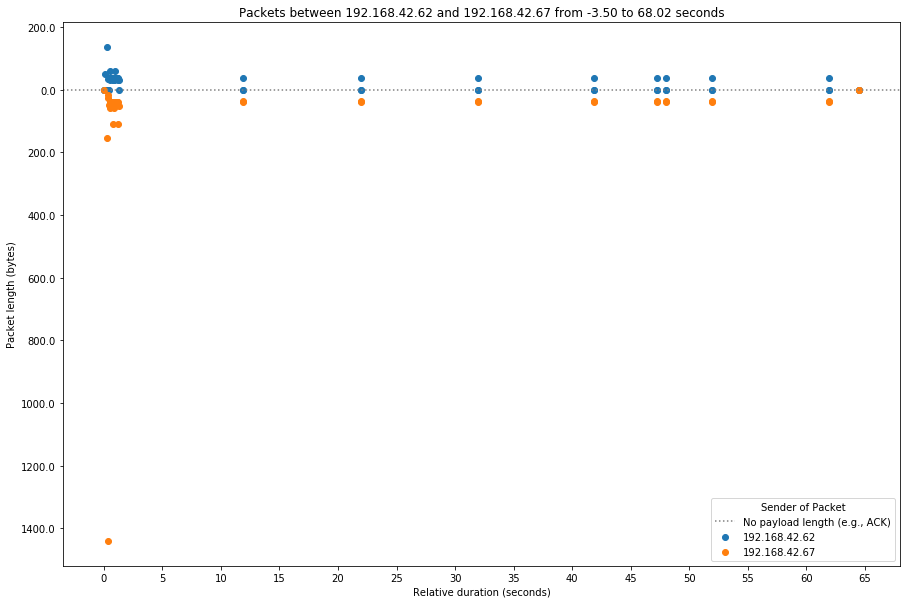

<Flow (192.168.42.62:33259 <--> 192.168.42.67:50008) of 128 packets; Open: False>


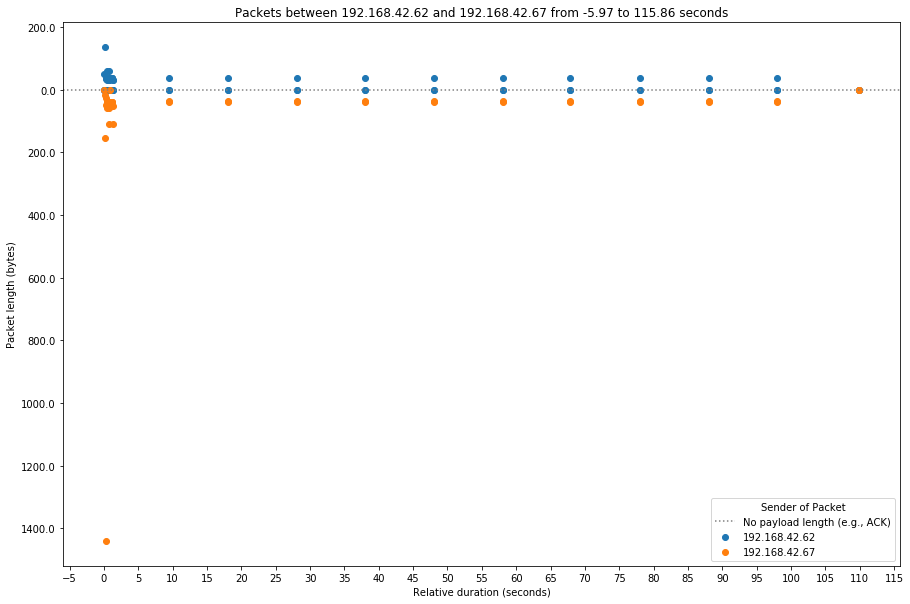

In [2]:
on_off_fa = FlowAnalyzer('../captures/switches/IDevicesDimmer/json/FormalOnOff.json')
for flow in on_off_fa.tcp_flows:
    fig = plt.figure(figsize=fig_size)
    ax = flow.get_packets_graph(draw_highlights=False)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    print(flow)
    plt.show()

##### Understanding the normal on/off operations
There are two distinct sections to these flows for this device, the first being the "handshake" between the app and the switch when the app is first opened, which we may "zoom in on" by limiting our window to only the first part of the experiment:

<Flow (192.168.42.62:33247 <--> 192.168.42.67:50008) of 106 packets; Open: False>


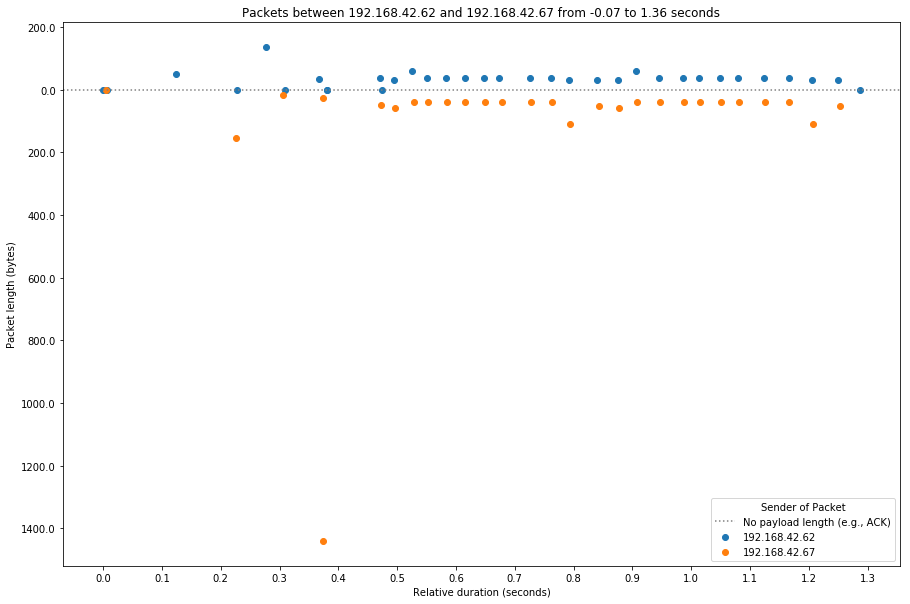

In [3]:
flow = on_off_fa.tcp_flows[0]
print(flow)
fig = plt.figure(figsize=fig_size)

ax = flow.get_packets_graph(duration_start=0, duration_end=5, draw_highlights=False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

Accordingly, we can take a closer look at one of the on/off operations as well. Note the drastic difference in the length of packets as compared to the "handshake":

<Flow (192.168.42.62:33247 <--> 192.168.42.67:50008) of 106 packets; Open: False>


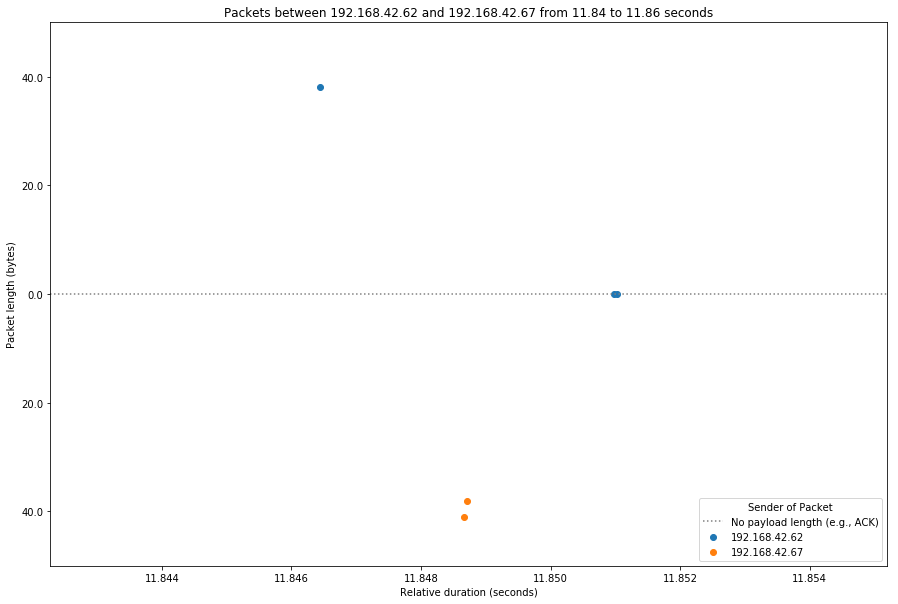

In [4]:
print(flow)
fig = plt.figure(figsize=fig_size)

ax = flow.get_packets_graph(duration_start=11.8, duration_end=12, draw_highlights=False)
ax.set_ylim(-50, 50)
plt.show()

#### Capability 2: Dimming Operations
The mobile app can be used to set the dim level on the switch. The interface is in the form of a slider. The following capture represents an experiment in which that slider was moved all the way from one position to the other over the course of 5 seconds.

<Flow (192.168.42.57:60498 <--> 192.168.42.62:50008) of 699 packets; Open: False>


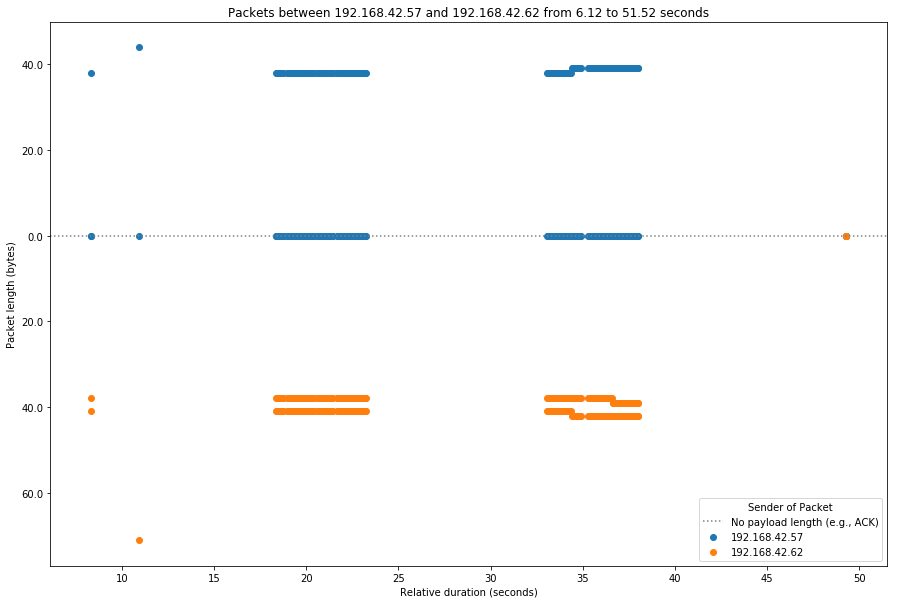

In [5]:
dim_fa = FlowAnalyzer('../captures/switches/IDevicesDimmer/json/DimSlider.json')
for f in dim_fa.tcp_flows:
    print(f)
    fig = plt.figure(figsize=fig_size)
    ax = f.get_packets_graph(duration_start=8, draw_highlights=False)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.show()

These patterns are somewhat similar to the on/off operations, but simply happen more frequently as the slider is moved in a continuous fashion.

#### Capability 3: Firmware Update
Perhaps the most striking contrast to all other operations of the applicaiton in terms of network behavior is the firmware update operation, when the mobile app initializes a firmware update, downloads and sends the update package to be installed on the switch.

The most interesting detail to note here is that the device that runs the mobile app is responsible for actually downloading the data and sending it to the switch, meaning that the switch sends short packets in comparison.

In this experiment, the firmware update took place in the first flow, and more on/off operations to check functionality took place in the second flow that started once the update had completed.

<Flow (192.168.42.57:60461 <--> 192.168.42.62:50008) of 1997 packets; Open: False>


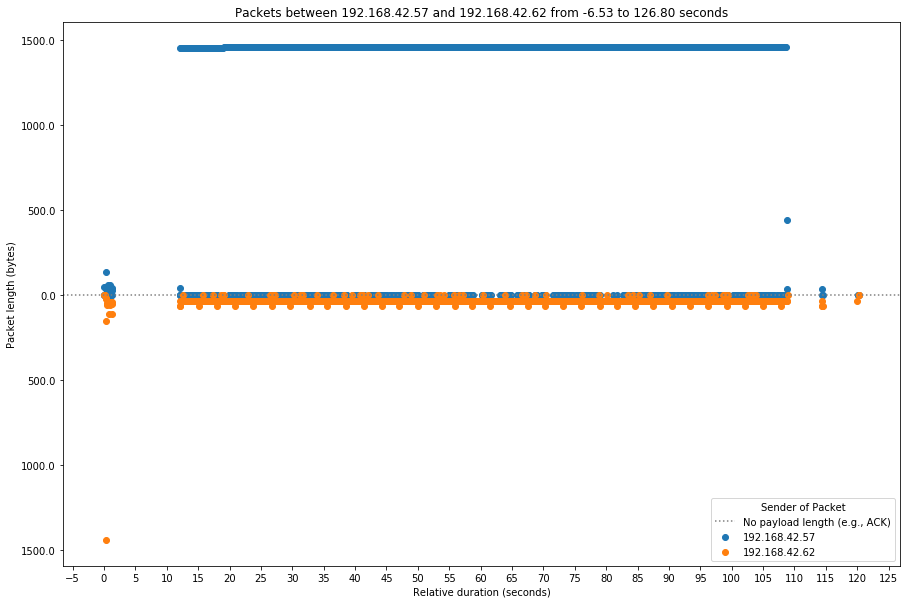

<Flow (192.168.42.57:60467 <--> 192.168.42.62:50008) of 55 packets; Open: True>


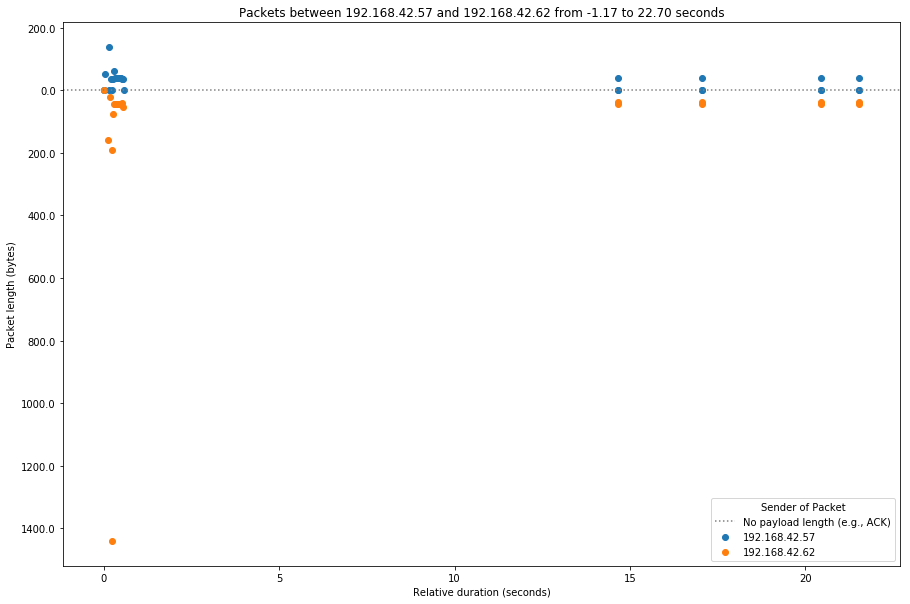

In [6]:
firm_fa = FlowAnalyzer('../captures/switches/IDevicesDimmer/json/FirmwareUpdate.json')
for f in firm_fa.tcp_flows:
    print(f)
    fig = plt.figure(figsize=fig_size)
    ax = f.get_packets_graph(draw_highlights=False)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.show()

#### Capability 4: Scheduling Operations
The switch also has the ability to have scheduled operations (for example, "turn on at 6PM on Wednesdays"). These schedules are programmed into the switch via the mobile app. These operations are also quite similar to the on/off operations.

<Flow (192.168.42.57:60544 <--> 192.168.42.62:50008) of 85 packets; Open: False>


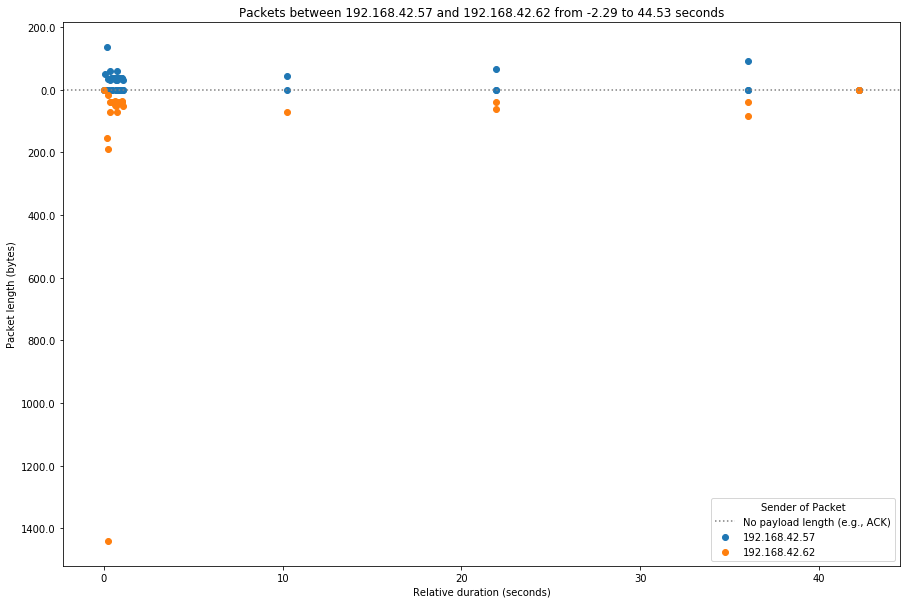

In [7]:
sched_fa = FlowAnalyzer('../captures/switches/IDevicesDimmer/json/Scheduling.json')
for f in sched_fa.tcp_flows:
    print(f)
    fig = plt.figure(figsize=fig_size)
    ax = f.get_packets_graph(draw_highlights=False)
    plt.show()

## Statistics and Interactions
Additionally, the `FlowAnalysis` module offers the ability to compute aggregate statistics for a single flow, as seen below:

In [8]:
on_off_flow = on_off_fa.tcp_flows[1]
print(on_off_flow)
stats = on_off_flow.get_aggregate_stats()
print(json.dumps(stats, indent=2, cls=StatsSerializer))

<Flow (192.168.42.62:33259 <--> 192.168.42.67:50008) of 128 packets; Open: False>
{
  "mode_src_len": 38,
  "mode_dst_len": 41,
  "avg_src_len": 39.83783783783784,
  "avg_dst_len": 76.19148936170212,
  "max_src_len": 136,
  "max_dst_len": 1440,
  "total_src_bytes": 1474,
  "total_dst_bytes": 3581,
  "num_interactions": 12,
  "avg_interaction_duration": 0.11519992351531982,
  "max_interaction_duration": 1.3212907314300537,
  "min_interaction_duration": 0.003996849060058594,
  "total_bytes": 5055
}


In [9]:
firm_flow = firm_fa.tcp_flows[0]
print(firm_flow)
stats = firm_flow.get_aggregate_stats()
print(json.dumps(stats, indent=2, cls=StatsSerializer))

<Flow (192.168.42.57:60461 <--> 192.168.42.62:50008) of 1997 packets; Open: False>
{
  "mode_src_len": 1460,
  "mode_dst_len": 38,
  "avg_src_len": 1396.0856313497823,
  "avg_dst_len": 41.47317744154058,
  "max_src_len": 1460,
  "max_dst_len": 1440,
  "total_src_bytes": 961903,
  "total_dst_bytes": 30151,
  "num_interactions": 4,
  "avg_interaction_duration": 24.677014708518982,
  "max_interaction_duration": 96.93812561035156,
  "min_interaction_duration": 0.1993868350982666,
  "total_bytes": 992054
}


Note the concept of "interactions" here. For the purposes of this work, we consider an interaction to be a stream or "burst" of packets that generally corresponds to a single action. The scatter plots above are drawn with these periods of interaction highlighted by default.

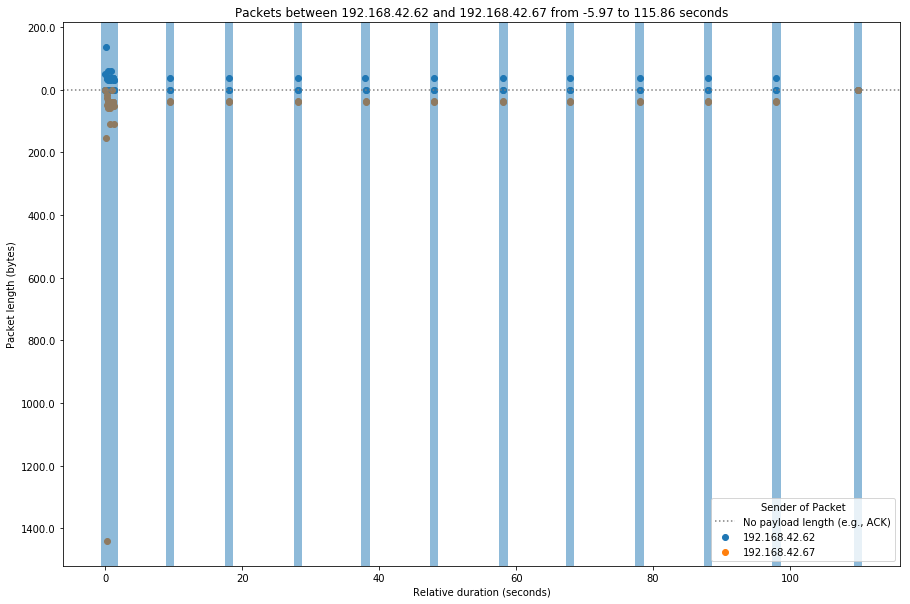

In [10]:
fig = plt.figure(figsize=fig_size)
ax = on_off_flow.get_packets_graph()
plt.show()

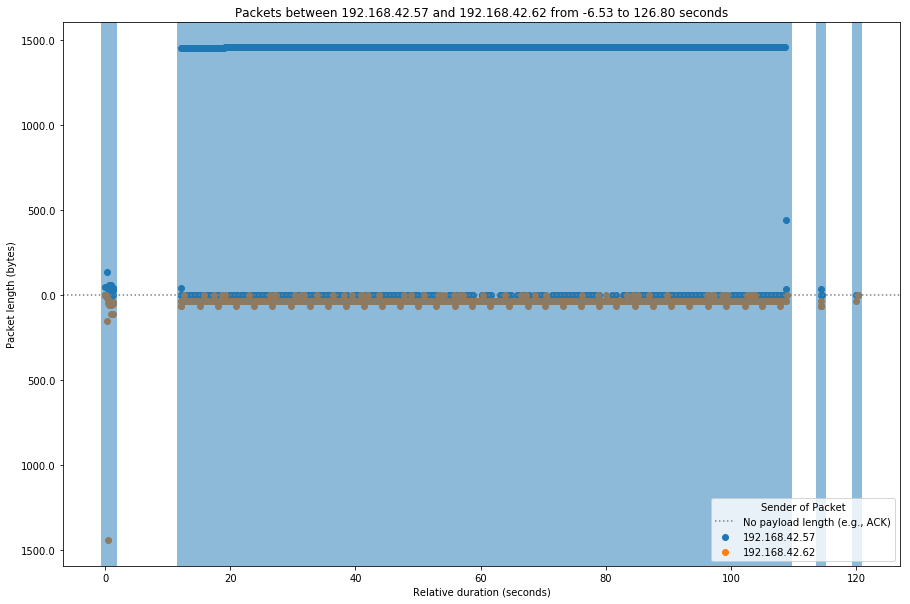

In [11]:
fig = plt.figure(figsize=fig_size)
ax = firm_flow.get_packets_graph()
plt.show()

Another notable side of the interactions is the possible discrepancy between the number of bytes sent by one device vs. the other. The firmware capability is a perfect candidate to display this:

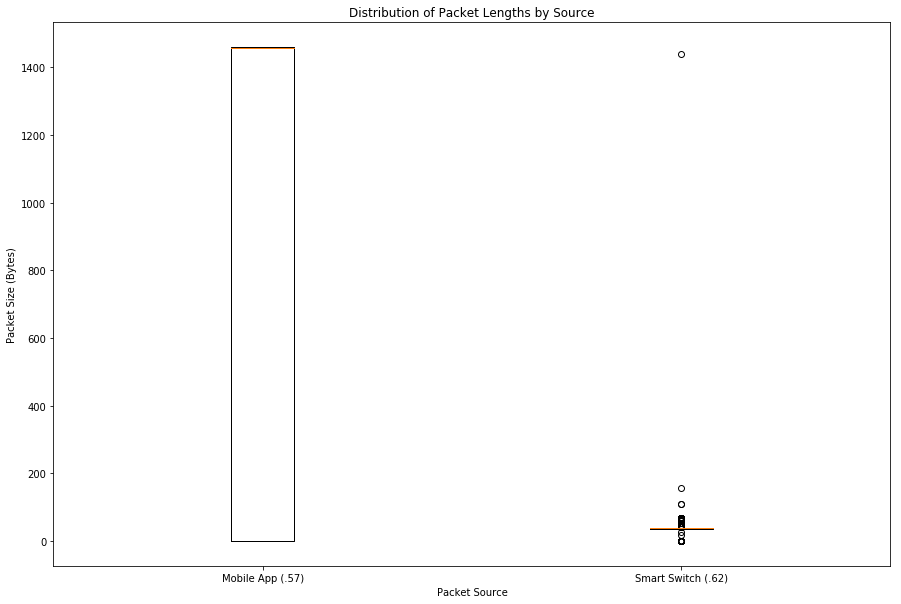

In [12]:
app_lens = [p.get('pkt_len') for p in firm_flow.get_packet_stats() if p.get('src_addr') == '192.168.42.57']
switch_lens = [p.get('pkt_len') for p in firm_flow.get_packet_stats() if p.get('src_addr') == '192.168.42.62']

fig, ax = plt.subplots()
ax.boxplot([app_lens, switch_lens])
ax.set_xticklabels(['Mobile App (.57)', 'Smart Switch (.62)'])
ax.set_ylabel('Packet Size (Bytes)')
ax.set_xlabel('Packet Source')
ax.set_title('Distribution of Packet Lengths by Source')

fig.set_size_inches(fig_size)

plt.show()

In [13]:
firm_flow.get_aggregate_stats()

{'mode_src_len': 1460,
 'mode_dst_len': 38,
 'avg_src_len': 1396.0856313497823,
 'avg_dst_len': 41.47317744154058,
 'max_src_len': 1460,
 'max_dst_len': 1440,
 'total_src_bytes': 961903,
 'total_dst_bytes': 30151,
 'num_interactions': 4,
 'avg_interaction_duration': 24.677014708518982,
 'max_interaction_duration': 96.93812561035156,
 'min_interaction_duration': 0.1993868350982666,
 'total_bytes': 992054}

Clearly, during a firmware update, the mobile app is responsible for the majority of data sends, in the form of full-length TCP packets. The switch does send a single packet that is quite large, at 1440 bytes. However, this is clearly not the norm for this flow/capability; this outlier is sent during the handshake operation. This can be eliminated by looking only at the interaction that represents the actual firmware update download:

In [14]:
firm_interaction = firm_flow.interactions[1]
print(firm_interaction)
print(json.dumps(firm_interaction.get_aggregate_stats(), cls=StatsSerializer, indent=2))

<itx of 1913 pkts over 96.94 sec>
{
  "avg_lens": {
    "192.168.42.57": 1453.5173978819969,
    "192.168.42.62": 38.968345323741005
  },
  "max_lens": {
    "192.168.42.57": 1460,
    "192.168.42.62": 67
  },
  "duration": 96.93812561035156,
  "total_bytes": 987858
}


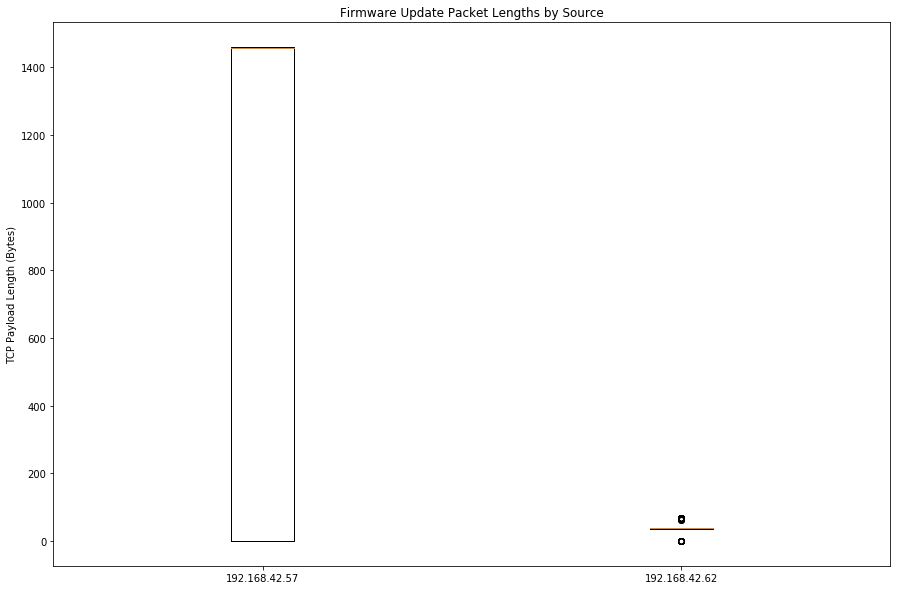

In [15]:
lens_by_src = {}
for p in firm_interaction:
    lens_by_src.setdefault(p.get('src_addr'), []).append(p.get('pkt_len'))

fig, ax = plt.subplots()
ax.boxplot([v for v in lens_by_src.values()])

ax.set_xticklabels([k for k in lens_by_src.keys()])
ax.set_title('Firmware Update Packet Lengths by Source')
ax.set_ylabel('TCP Payload Length (Bytes)')

fig.set_size_inches(fig_size)
plt.show()

We can clearly see a drastic difference in this kind of graph when we compare to a combined few of the on/off operaton interaction (without the handshake). Note that the construction of a new interaction here does not follow our definition of an interaction, but should be instead considered as a grouping of packets.

In [16]:
on_off_flow.interactions

[<itx of 74 pkts over 1.32 sec>,
 <itx of 5 pkts over 0.01 sec>,
 <itx of 5 pkts over 0.00 sec>,
 <itx of 5 pkts over 0.01 sec>,
 <itx of 5 pkts over 0.01 sec>,
 <itx of 5 pkts over 0.01 sec>,
 <itx of 5 pkts over 0.01 sec>,
 <itx of 5 pkts over 0.01 sec>,
 <itx of 5 pkts over 0.01 sec>,
 <itx of 5 pkts over 0.01 sec>,
 <itx of 5 pkts over 0.01 sec>,
 <itx of 4 pkts over 0.00 sec>]

In [17]:
multiple_on_off = [p for i in on_off_flow.interactions[1:6] for p in i]
on_off_interaction = Interaction(multiple_on_off)
print(on_off_interaction)
print(json.dumps(on_off_interaction.get_aggregate_stats(), cls=StatsSerializer, indent=2))

<itx of 25 pkts over 38.55 sec>
{
  "avg_lens": {
    "192.168.42.62": 38.0,
    "192.168.42.67": 39.5
  },
  "max_lens": {
    "192.168.42.62": 38,
    "192.168.42.67": 41
  },
  "duration": 38.550130128860474,
  "total_bytes": 585
}


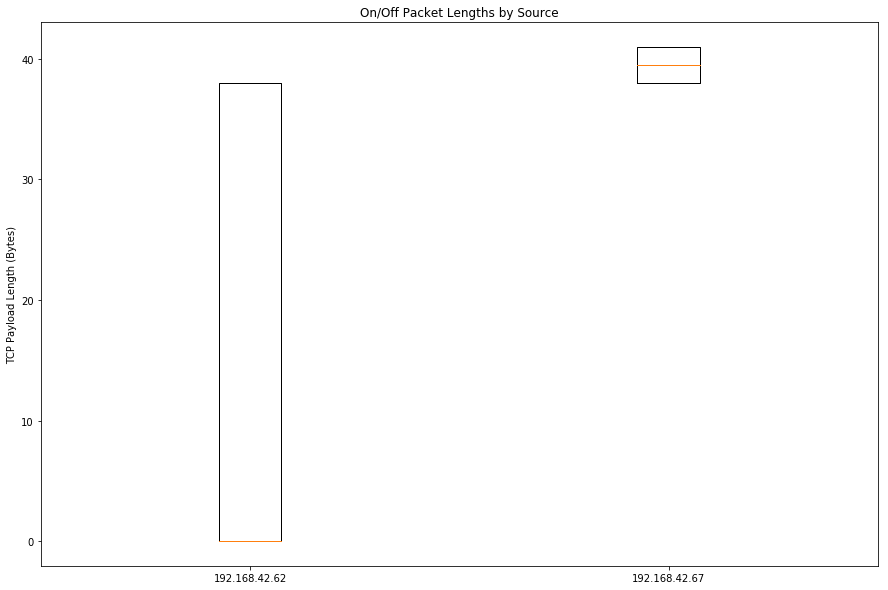

In [18]:
lens_by_src = {}
for p in on_off_interaction:
    lens_by_src.setdefault(p.get('src_addr'), []).append(p.get('pkt_len'))

fig, ax = plt.subplots()
ax.boxplot([v for v in lens_by_src.values()])

ax.set_xticklabels([k for k in lens_by_src.keys()])
ax.set_title('On/Off Packet Lengths by Source')
ax.set_ylabel('TCP Payload Length (Bytes)')

fig.set_size_inches(fig_size)
plt.show()

In the figure above, not only are the payload lengths shorter overall, but the mobile app's (`192.168.42.62`) median length is significantly shorter than that of the mobile app (`192.168.42.67`).

## What Might a Policy Look Like?
In this work, a policy is meant to capture an operation of the device. The access control model for this work takes place at the network level, where attributes are those described in this notebook (network characteristics and behavior of the device). The goal of a policy decision point is to determine if a packet in transit (either to or from the device in question) conforms to the policies that have been put in place. Because the network attributes described here cannot directly identify *which* operation is taking place, there is an underlying assumption that all policies are combined and considered, as is standard in access control schemes like XACML and NGAC.

A policy is made up of a set of rules, or constraints, on the network characteristics described here. These constraints limit these behaviors to what we would expect to see during normal operational use of the device for the operation in question.

#### Modeling the Handshake Operation
The "handshake" described above is not technically an enumerated capability of the IDevices dimmer switch, but it is unique enough in its network characteristics that it should be considered in its own policy. Additionally, this policy is necessary because any interaction between the mobile app and the switch begins with this handshake operation, regardless of what operations (if any) follow it.

We must first observe the statistical nature of the handshake, which we can do as it occurred for a number of different operations. A first question that is good to ask is "how similar are the handshakes between operations?"

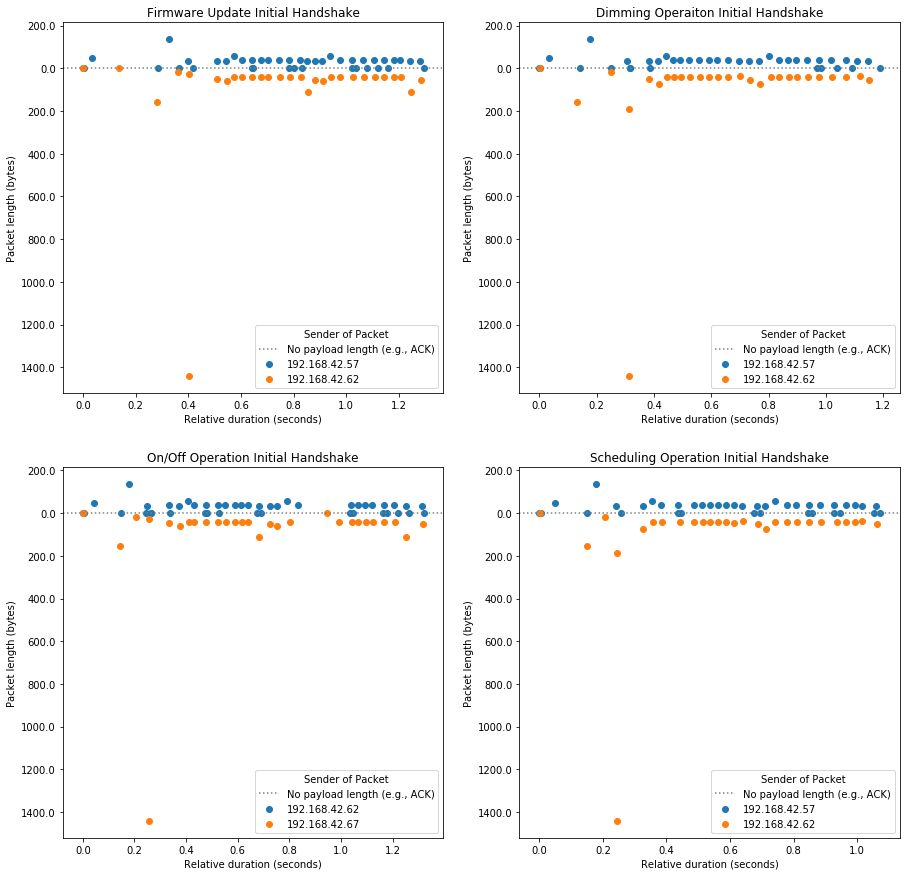

Fimrware Update Handshake:
{
  "mode_src_len": 38,
  "mode_dst_len": 41,
  "avg_src_len": 40.51851851851852,
  "avg_dst_len": 103.37037037037037,
  "max_src_len": 136,
  "max_dst_len": 1440,
  "total_src_bytes": 1094,
  "total_dst_bytes": 2791,
  "num_interactions": 1,
  "avg_interaction_duration": 1.2954437732696533,
  "max_interaction_duration": 1.2954437732696533,
  "min_interaction_duration": 1.2954437732696533,
  "total_bytes": 3885
}
On/Off Handshake:
{
  "mode_src_len": 38,
  "mode_dst_len": 41,
  "avg_src_len": 40.51851851851852,
  "avg_dst_len": 103.37037037037037,
  "max_src_len": 136,
  "max_dst_len": 1440,
  "total_src_bytes": 1094,
  "total_dst_bytes": 2791,
  "num_interactions": 1,
  "avg_interaction_duration": 1.3212907314300537,
  "max_interaction_duration": 1.3212907314300537,
  "min_interaction_duration": 1.3212907314300537,
  "total_bytes": 3885
}
Dimming Handshake:
{
  "mode_src_len": 38,
  "mode_dst_len": 41,
  "avg_src_len": 40.592592592592595,
  "avg_dst_len": 10

In [19]:
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

firm_flow.get_packets_graph(ax=ax1, duration_start=0, duration_end=2, draw_highlights=False)
on_off_flow.get_packets_graph(ax=ax2, duration_start=0, duration_end=2, draw_highlights=False)
dim_fa.tcp_flows[0].get_packets_graph(ax=ax3, duration_start=0, duration_end=2, draw_highlights=False)
sched_fa.tcp_flows[0].get_packets_graph(ax=ax4, duration_start=0, duration_end=2, draw_highlights=False)

ax1.set_title('Firmware Update Initial Handshake')
ax2.set_title('On/Off Operation Initial Handshake')
ax3.set_title('Dimming Operaiton Initial Handshake')
ax4.set_title('Scheduling Operation Initial Handshake')

plt.show()

print('Fimrware Update Handshake:')
print(json.dumps(firm_flow.get_aggregate_stats(duration_start=0, duration_end=2), cls=StatsSerializer, indent=2))
print('On/Off Handshake:')
print(json.dumps(on_off_flow.get_aggregate_stats(duration_start=0, duration_end=2), cls=StatsSerializer, indent=2))
print('Dimming Handshake:')
print(json.dumps(dim_fa.tcp_flows[0].get_aggregate_stats(duration_start=0, duration_end=2), cls=StatsSerializer, indent=2))
print('Scheduling Handshake:')
print(json.dumps(sched_fa.tcp_flows[0].get_aggregate_stats(duration_start=0, duration_end=2), cls=StatsSerializer, indent=2))

While there are slight variatons in the toal number of bytes sent during the handshake (from both ends of the flow) and in the arrival times of packets, we can see that the handshake operation is generally the same regardless of what operations follow it.

Because this subset of the flow is made up by only one interaction (the handshake itself), the statistical view at the interaction level would be the same.

What can we derive from this? We can say with confidence that the handshake should:
* Occur in a single interaction.
* Should not exceed 4,000 bytes of total payload length.
  * This attribute seems to be the most variable.
* The maximum number of bytes in a single TCP payload from the mobile app should not be greater than 140 bytes.
* The maximum number of bytes in a single TCP payload from the switch should not be greater than 1440 bytes.
* The average TCP payload length during the handshake interaction for packets from the mobile app should not be greater than 50 bytes.
* The average TCP payload length during the handshake interaction for packets from the switch should not be greater than 150 bytes.
* The interaction should not exceed a duration of 3 seconds.

Note that some of these numbers are arbitrary, allowing for slight variations in maximum lengths that have been observed during other captures. For example, the average payload length from the mobile app to the switch on its first connection to the switch during onboarding is slightly higher, at ~44-50 bytes.

Here's an example of when the handshake behaved a bit differently, when the switch was onboarding:

<Flow (192.168.42.57:53365 <--> 192.168.42.62:50008) of 625 packets; Open: False>


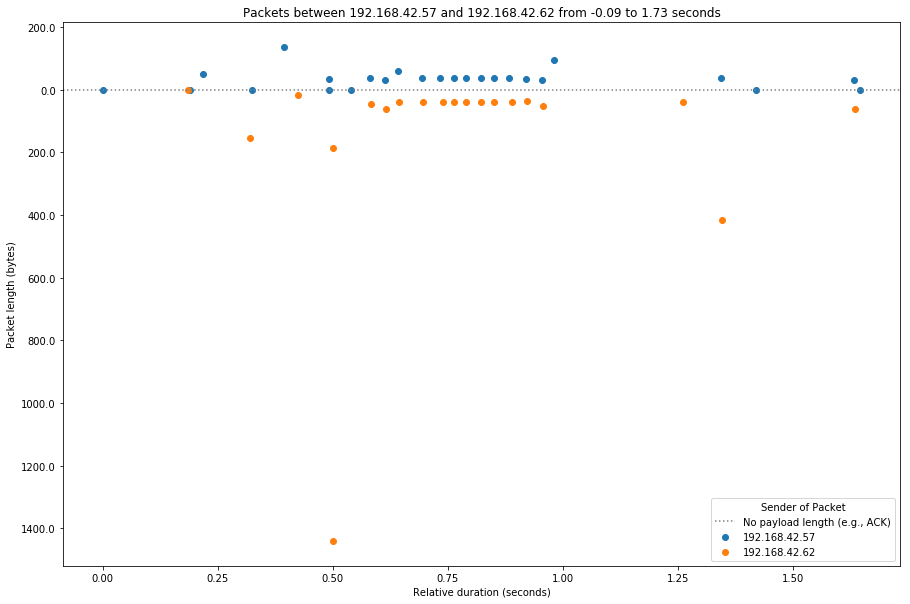

{
  "mode_src_len": 38,
  "mode_dst_len": 41,
  "avg_src_len": 44.05263157894737,
  "avg_dst_len": 149.8421052631579,
  "max_src_len": 136,
  "max_dst_len": 1440,
  "total_src_bytes": 837,
  "total_dst_bytes": 2847,
  "num_interactions": 1,
  "avg_interaction_duration": 1.6458094120025635,
  "max_interaction_duration": 1.6458094120025635,
  "min_interaction_duration": 1.6458094120025635,
  "total_bytes": 3684
}


In [20]:
full_reset_fa = FlowAnalyzer('../captures/switches/IDevicesDimmer/json/FullReset.json')
onboarding_flow = full_reset_fa.tcp_flows[0]
print(onboarding_flow)
fig = plt.figure(figsize=fig_size)
ax = onboarding_flow.get_packets_graph(duration_start=0, duration_end=2, draw_highlights=False)

plt.show()

print(json.dumps(onboarding_flow.get_aggregate_stats(duration_start=0, duration_end=2), cls=StatsSerializer, indent=2))

For this specific example, the switch (`192.168.42.62`) is clearly passing along some information that the mobile app doesn't yet have, resulting in a higher average payload length. This fact is further illustrated by the next flow in the capture, where the numbers have returned to values more reminiscent of the "normal use" numbers above. 

In [21]:
full_reset_fa.tcp_flows[1].get_aggregate_stats(duration_start=0, duration_end=2)

{'mode_src_len': 38,
 'mode_dst_len': 41,
 'avg_src_len': 40.592592592592595,
 'avg_dst_len': 104.07407407407408,
 'max_src_len': 136,
 'max_dst_len': 1440,
 'total_src_bytes': 1096,
 'total_dst_bytes': 2810,
 'num_interactions': 1,
 'avg_interaction_duration': 1.2353758811950684,
 'max_interaction_duration': 1.2353758811950684,
 'min_interaction_duration': 1.2353758811950684,
 'total_bytes': 3906}

These variations remain a topic for future work. It may be the case that policies would need to account for these minor variations, though intution would suggest that these would only occur for some operations.